In [80]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

In [81]:
# Loading the data
ba = pd.read_csv("/content/BA_reviews.csv")

In [82]:
# Checking the head of data

ba.head()

Unnamed: 0                                            reviews
0           0  ✅ Trip Verified |  The plane was extremely dir...
1           1  Not Verified | Overall journey wasn’t bad howe...
2           2  ✅ Trip Verified |  Overall very satisfied. Gro...
3           3  ✅ Trip Verified |  As always when I fly BA it ...
4           4  ✅ Trip Verified |  First time using BA busines...

In [83]:
# droping the columns

ba = ba.drop('Unnamed: 0', axis = 1)

In [84]:
# Removing the symbols
ba['reviews'] = ba['reviews'].str.replace('✅', '')
ba['reviews'] = ba['reviews'].str.replace('Trip Verified', '')
ba['reviews'] = ba['reviews'].str.replace('Not Verified', '')
ba['reviews'] = ba['reviews'].str.replace('|', '')

<ipython-input-84-bb43343a483d>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ba['reviews'] = ba['reviews'].str.replace('|', '')


In [85]:
ba

reviews
0        The plane was extremely dirty with chocola...
1      Overall journey wasn’t bad however at the en...
2        Overall very satisfied. Ground staff membe...
3        As always when I fly BA it was a total sha...
4        First time using BA business class but we ...
..                                                 ...
995      London to Chennai. It was amazing. The cre...
996     London to Tampa. BA broke my suitcase and I...
997      My husband and I flew on British Airways f...
998      Bridgetown to Gatwick. I couldn't imagine ...
999      London to Athens. Classic BA love and hate...

[1000 rows x 1 columns]

In [86]:
# Converting to dataframe
ba = pd.DataFrame(ba)

In [87]:
ba

reviews
0        The plane was extremely dirty with chocola...
1      Overall journey wasn’t bad however at the en...
2        Overall very satisfied. Ground staff membe...
3        As always when I fly BA it was a total sha...
4        First time using BA business class but we ...
..                                                 ...
995      London to Chennai. It was amazing. The cre...
996     London to Tampa. BA broke my suitcase and I...
997      My husband and I flew on British Airways f...
998      Bridgetown to Gatwick. I couldn't imagine ...
999      London to Athens. Classic BA love and hate...

[1000 rows x 1 columns]

In [88]:
# Squeeze -> scalars

ba = ba.squeeze()

In [89]:
# Droping Missing Values
ba = ba.dropna()

In [90]:
# Lowercase text

series_lower = ba.apply(lambda x: x.lower())
print(series_lower)

0          the plane was extremely dirty with chocola...
1        overall journey wasn’t bad however at the en...
2          overall very satisfied. ground staff membe...
3          as always when i fly ba it was a total sha...
4          first time using ba business class but we ...
                             ...                        
995        london to chennai. it was amazing. the cre...
996       london to tampa. ba broke my suitcase and i...
997        my husband and i flew on british airways f...
998        bridgetown to gatwick. i couldn't imagine ...
999        london to athens. classic ba love and hate...
Name: reviews, Length: 1000, dtype: object


In [91]:
# Removing Casefold

series_casefold = ba.apply(lambda x: x.casefold())
print(series_casefold)

0          the plane was extremely dirty with chocola...
1        overall journey wasn’t bad however at the en...
2          overall very satisfied. ground staff membe...
3          as always when i fly ba it was a total sha...
4          first time using ba business class but we ...
                             ...                        
995        london to chennai. it was amazing. the cre...
996       london to tampa. ba broke my suitcase and i...
997        my husband and i flew on british airways f...
998        bridgetown to gatwick. i couldn't imagine ...
999        london to athens. classic ba love and hate...
Name: reviews, Length: 1000, dtype: object


In [92]:
# Removing punctuation

import string
series_casefold = series_casefold.apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))

In [93]:
# Removing the numbers

series_casefold = series_casefold.apply(lambda x: x.translate(str.maketrans('','', string.digits)))

In [94]:
series_casefold

0          the plane was extremely dirty with chocola...
1        overall journey wasn’t bad however at the en...
2          overall very satisfied ground staff member...
3          as always when i fly ba it was a total sha...
4          first time using ba business class but we ...
                             ...                        
995        london to chennai it was amazing the crew ...
996       london to tampa ba broke my suitcase and i ...
997        my husband and i flew on british airways f...
998        bridgetown to gatwick i couldnt imagine th...
999        london to athens classic ba love and hate ...
Name: reviews, Length: 1000, dtype: object

In [95]:
# remove white spaces

series_casefold = series_casefold.str.strip()
print(series_casefold)

0      the plane was extremely dirty with chocolate s...
1      overall journey wasn’t bad however at the end ...
2      overall very satisfied ground staff member at ...
3      as always when i fly ba it was a total shamble...
4      first time using ba business class but we were...
                             ...                        
995    london to chennai it was amazing the crew were...
996    london to tampa ba broke my suitcase and i did...
997    my husband and i flew on british airways fligh...
998    bridgetown to gatwick i couldnt imagine that f...
999    london to athens classic ba love and hate rela...
Name: reviews, Length: 1000, dtype: object


In [96]:
data = series_casefold

In [97]:
# Importing NLP Libraries
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [98]:
# Word Tokenizer

from nltk.tokenize import word_tokenize

token_data = [word_tokenize(word) for word in data]
print(token_data)

[['the', 'plane', 'was', 'extremely', 'dirty', 'with', 'chocolate', 'smudged', 'all', 'over', 'mine', 'and', 'my', 'childrens', 'seats', 'i', 'had', 'to', 'wipe', 'down', 'all', 'the', 'seats', 'after', 'we', 'landed', 'i', 'immediately', 'realized', 'i', 'left', 'my', 'camera', 'with', 'its', 'bag', 'in', 'the', 'airplane', 'overhead', 'cabin', 'they', 'would', 'not', 'let', 'me', 'back', 'on', 'the', 'plane', 'for', 'security', 'reasons', 'so', 'i', 'went', 'to', 'the', 'british', 'airways', 'team', 'on', 'ground', 'they', 'refused', 'to', 'contact', 'cabin', 'crew', 'only', 'until', 'we', 'threw', 'up', 'a', 'massive', 'fuss', 'then', 'the', 'manager', 'reluctantly', 'agreed', 'which', 'by', 'that', 'point', 'cabin', 'crew', 'had', 'disembarked', 'now', 'its', 'been', 'over', 'weeks', 'with', 'no', 'sign', 'of', 'my', 'camera', 'so', 'it', 'is', 'assumed', 'stolen', 'i', 'have', 'complained', 'to', 'british', 'airways', 'and', 'all', 'i', 'get', 'is', 'an', 'automatedgeneric', 'resp

In [99]:
# Sentence Tokenizer

from nltk.tokenize import sent_tokenize

sent_token = [sent_tokenize(doc) for doc in data]
print(sent_token)

[['the plane was extremely dirty with chocolate smudged all over mine and my childrens seats i had to wipe down all the seats after we landed i immediately realized i left my camera with its bag in the airplane overhead cabin they would not let me back on the plane for security reasons so i went to the british airways team on ground  they refused to contact cabin crew only until we threw up a massive fuss then the manager reluctantly agreed which by that point cabin crew had disembarked now its been over  weeks with no sign of my camera so it is assumed stolen i have complained to british airways and all i get is an automatedgeneric response to keep checking with lost property zero customer service for their regular customers and this all could have been mitigated if they had been willing to help at the very beginning  very disappointed'], ['overall journey wasn’t bad however at the end the baggage arrival nearly took  hours more than actual flight time baggage of other flights arrivin

In [100]:
# Punctuation Removal

import re

regex = re.compile('[%s]' % re.escape(string.punctuation))

tokenized_data_no_punctuation = []

for comments in token_data:
    new_comments = []
    for token in comments:
        new_token = regex.sub(u'', token)
        if not new_token == u'':
            new_comments.append(new_token)

    tokenized_data_no_punctuation.append(new_comments)

print(tokenized_data_no_punctuation)

[['the', 'plane', 'was', 'extremely', 'dirty', 'with', 'chocolate', 'smudged', 'all', 'over', 'mine', 'and', 'my', 'childrens', 'seats', 'i', 'had', 'to', 'wipe', 'down', 'all', 'the', 'seats', 'after', 'we', 'landed', 'i', 'immediately', 'realized', 'i', 'left', 'my', 'camera', 'with', 'its', 'bag', 'in', 'the', 'airplane', 'overhead', 'cabin', 'they', 'would', 'not', 'let', 'me', 'back', 'on', 'the', 'plane', 'for', 'security', 'reasons', 'so', 'i', 'went', 'to', 'the', 'british', 'airways', 'team', 'on', 'ground', 'they', 'refused', 'to', 'contact', 'cabin', 'crew', 'only', 'until', 'we', 'threw', 'up', 'a', 'massive', 'fuss', 'then', 'the', 'manager', 'reluctantly', 'agreed', 'which', 'by', 'that', 'point', 'cabin', 'crew', 'had', 'disembarked', 'now', 'its', 'been', 'over', 'weeks', 'with', 'no', 'sign', 'of', 'my', 'camera', 'so', 'it', 'is', 'assumed', 'stolen', 'i', 'have', 'complained', 'to', 'british', 'airways', 'and', 'all', 'i', 'get', 'is', 'an', 'automatedgeneric', 'resp

In [101]:
# Removing Stopwords

import nltk
nltk.download('stopwords')

tokenized_data_no_stopwords = []

for docs in tokenized_data_no_punctuation:
    new_term_vector = []
    for word in docs:
        if not word in stopwords.words('english'):
            new_term_vector.append(word)

    tokenized_data_no_stopwords.append(new_term_vector)

print(tokenized_data_no_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['plane', 'extremely', 'dirty', 'chocolate', 'smudged', 'mine', 'childrens', 'seats', 'wipe', 'seats', 'landed', 'immediately', 'realized', 'left', 'camera', 'bag', 'airplane', 'overhead', 'cabin', 'would', 'let', 'back', 'plane', 'security', 'reasons', 'went', 'british', 'airways', 'team', 'ground', 'refused', 'contact', 'cabin', 'crew', 'threw', 'massive', 'fuss', 'manager', 'reluctantly', 'agreed', 'point', 'cabin', 'crew', 'disembarked', 'weeks', 'sign', 'camera', 'assumed', 'stolen', 'complained', 'british', 'airways', 'get', 'automatedgeneric', 'response', 'keep', 'checking', 'lost', 'property', 'zero', 'customer', 'service', 'regular', 'customers', 'could', 'mitigated', 'willing', 'help', 'beginning', 'disappointed'], ['overall', 'journey', '’', 'bad', 'however', 'end', 'baggage', 'arrival', 'nearly', 'took', 'hours', 'actual', 'flight', 'time', 'baggage', 'flights', 'arriving', 'delivered', 'whereas', 'baggage', 'staff', 'airport', 'clue', 'information', 'baggage', 'flight', '

In [102]:
# Punctuation Removal

import re

regex = re.compile('[%s]' % re.escape(string.punctuation))

tokenized_data_no_punctuation = []

for comments in token_data:
    new_comments = []
    for token in comments:
        new_token = regex.sub(u'', token)
        if not new_token == u'':
            new_comments.append(new_token)

    tokenized_data_no_punctuation.append(new_comments)

print(tokenized_data_no_punctuation)

[['the', 'plane', 'was', 'extremely', 'dirty', 'with', 'chocolate', 'smudged', 'all', 'over', 'mine', 'and', 'my', 'childrens', 'seats', 'i', 'had', 'to', 'wipe', 'down', 'all', 'the', 'seats', 'after', 'we', 'landed', 'i', 'immediately', 'realized', 'i', 'left', 'my', 'camera', 'with', 'its', 'bag', 'in', 'the', 'airplane', 'overhead', 'cabin', 'they', 'would', 'not', 'let', 'me', 'back', 'on', 'the', 'plane', 'for', 'security', 'reasons', 'so', 'i', 'went', 'to', 'the', 'british', 'airways', 'team', 'on', 'ground', 'they', 'refused', 'to', 'contact', 'cabin', 'crew', 'only', 'until', 'we', 'threw', 'up', 'a', 'massive', 'fuss', 'then', 'the', 'manager', 'reluctantly', 'agreed', 'which', 'by', 'that', 'point', 'cabin', 'crew', 'had', 'disembarked', 'now', 'its', 'been', 'over', 'weeks', 'with', 'no', 'sign', 'of', 'my', 'camera', 'so', 'it', 'is', 'assumed', 'stolen', 'i', 'have', 'complained', 'to', 'british', 'airways', 'and', 'all', 'i', 'get', 'is', 'an', 'automatedgeneric', 'resp

In [103]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [104]:
# Stemming and Lemmatization

from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter = PorterStemmer()
wordnet = WordNetLemmatizer()

preprocessed_docs = []

for docs in tokenized_data_no_stopwords:
    final_doc = []
    for word in docs:
        #final_doc.append(porter.stem(word))
        final_doc.append(wordnet.lemmatize(word))

    preprocessed_docs.append(final_doc)

print(preprocessed_docs)

[['plane', 'extremely', 'dirty', 'chocolate', 'smudged', 'mine', 'childrens', 'seat', 'wipe', 'seat', 'landed', 'immediately', 'realized', 'left', 'camera', 'bag', 'airplane', 'overhead', 'cabin', 'would', 'let', 'back', 'plane', 'security', 'reason', 'went', 'british', 'airway', 'team', 'ground', 'refused', 'contact', 'cabin', 'crew', 'threw', 'massive', 'fuss', 'manager', 'reluctantly', 'agreed', 'point', 'cabin', 'crew', 'disembarked', 'week', 'sign', 'camera', 'assumed', 'stolen', 'complained', 'british', 'airway', 'get', 'automatedgeneric', 'response', 'keep', 'checking', 'lost', 'property', 'zero', 'customer', 'service', 'regular', 'customer', 'could', 'mitigated', 'willing', 'help', 'beginning', 'disappointed'], ['overall', 'journey', '’', 'bad', 'however', 'end', 'baggage', 'arrival', 'nearly', 'took', 'hour', 'actual', 'flight', 'time', 'baggage', 'flight', 'arriving', 'delivered', 'whereas', 'baggage', 'staff', 'airport', 'clue', 'information', 'baggage', 'flight', '’', 'arri

In [105]:
preprocessed_docs =  data

In [106]:
# POS Tagging

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [107]:
tokens = nltk.word_tokenize(str(data))

In [108]:
tokens

['0',
 'the',
 'plane',
 'was',
 'extremely',
 'dirty',
 'with',
 'chocolate',
 's',
 '...',
 '1',
 'overall',
 'journey',
 'wasn',
 '’',
 't',
 'bad',
 'however',
 'at',
 'the',
 'end',
 '...',
 '2',
 'overall',
 'very',
 'satisfied',
 'ground',
 'staff',
 'member',
 'at',
 '...',
 '3',
 'as',
 'always',
 'when',
 'i',
 'fly',
 'ba',
 'it',
 'was',
 'a',
 'total',
 'shamble',
 '...',
 '4',
 'first',
 'time',
 'using',
 'ba',
 'business',
 'class',
 'but',
 'we',
 'were',
 '...',
 '...',
 '995',
 'london',
 'to',
 'chennai',
 'it',
 'was',
 'amazing',
 'the',
 'crew',
 'were',
 '...',
 '996',
 'london',
 'to',
 'tampa',
 'ba',
 'broke',
 'my',
 'suitcase',
 'and',
 'i',
 'did',
 '...',
 '997',
 'my',
 'husband',
 'and',
 'i',
 'flew',
 'on',
 'british',
 'airways',
 'fligh',
 '...',
 '998',
 'bridgetown',
 'to',
 'gatwick',
 'i',
 'couldnt',
 'imagine',
 'that',
 'f',
 '...',
 '999',
 'london',
 'to',
 'athens',
 'classic',
 'ba',
 'love',
 'and',
 'hate',
 'rela',
 '...',
 'Name',
 ':

In [109]:
tagged = nltk.pos_tag(tokens)

In [110]:

tagged

[('0', 'CD'),
 ('the', 'DT'),
 ('plane', 'NN'),
 ('was', 'VBD'),
 ('extremely', 'RB'),
 ('dirty', 'JJ'),
 ('with', 'IN'),
 ('chocolate', 'NN'),
 ('s', 'NNS'),
 ('...', ':'),
 ('1', 'CD'),
 ('overall', 'JJ'),
 ('journey', 'NN'),
 ('wasn', 'NN'),
 ('’', 'NNP'),
 ('t', 'NN'),
 ('bad', 'JJ'),
 ('however', 'RB'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('end', 'NN'),
 ('...', ':'),
 ('2', 'CD'),
 ('overall', 'JJ'),
 ('very', 'RB'),
 ('satisfied', 'JJ'),
 ('ground', 'NN'),
 ('staff', 'NN'),
 ('member', 'NN'),
 ('at', 'IN'),
 ('...', ':'),
 ('3', 'CD'),
 ('as', 'IN'),
 ('always', 'RB'),
 ('when', 'WRB'),
 ('i', 'JJ'),
 ('fly', 'VBP'),
 ('ba', 'IN'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('total', 'JJ'),
 ('shamble', 'JJ'),
 ('...', ':'),
 ('4', 'CD'),
 ('first', 'JJ'),
 ('time', 'NN'),
 ('using', 'VBG'),
 ('ba', 'JJ'),
 ('business', 'NN'),
 ('class', 'NN'),
 ('but', 'CC'),
 ('we', 'PRP'),
 ('were', 'VBD'),
 ('...', ':'),
 ('...', ':'),
 ('995', 'CD'),
 ('london', 'NN'),
 ('to', 'TO'),
 ('ch

In [111]:

data

0      the plane was extremely dirty with chocolate s...
1      overall journey wasn’t bad however at the end ...
2      overall very satisfied ground staff member at ...
3      as always when i fly ba it was a total shamble...
4      first time using ba business class but we were...
                             ...                        
995    london to chennai it was amazing the crew were...
996    london to tampa ba broke my suitcase and i did...
997    my husband and i flew on british airways fligh...
998    bridgetown to gatwick i couldnt imagine that f...
999    london to athens classic ba love and hate rela...
Name: reviews, Length: 1000, dtype: object

In [112]:
# NER - Named Entities Recognition

import spacy
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')

FoundEntities=nlp(str(data))

for X in FoundEntities.ents:
    print([(X.text, X.label_)])

[('1', 'CARDINAL')]
[('2', 'CARDINAL')]
[('3      ', 'QUANTITY')]
[('4', 'CARDINAL')]
[('first', 'ORDINAL')]
[('995', 'CARDINAL')]
[('london', 'GPE')]
[('996', 'CARDINAL')]
[('london', 'GPE')]
[('tampa', 'GPE')]
[('997', 'CARDINAL')]
[('british', 'NORP')]
[('998', 'CARDINAL')]
[('999', 'CARDINAL')]
[('london', 'GPE')]
[('Length', 'PERSON')]
[('1000', 'CARDINAL')]


In [113]:
# NORP - NAtionalities or religious or political groups
# GPE - Countries, cities, states
# ORG - Companies, agencies, institutions, etc

In [114]:
# LSA - LDA (Latent Semantic Analysis & Latent Dirichlet Allocation)

In [115]:
from sklearn.feature_extraction.text import CountVectorizer as CountVectorizer

small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = data.sample(n=10000, random_state=0, replace = True).values

print('Headline before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n{}'.format(small_document_term_matrix[123]))

Headline before vectorization: disappointing again especially on business the service is ancient one world lounges are a catastrophe at heathrow business class seat is similar to economy and electronics are very poor onboard
Headline after vectorization: 
  (0, 2059)	1
  (0, 5648)	1
  (0, 2933)	1
  (0, 881)	2
  (0, 1155)	1
  (0, 5579)	1
  (0, 7098)	1
  (0, 4707)	1
  (0, 1835)	1
  (0, 2215)	1
  (0, 4334)	1
  (0, 282)	1
  (0, 3751)	1
  (0, 1000)	1
  (0, 5763)	1
  (0, 2090)	1


In [116]:
n_topics = 8

In [117]:
# LSA

from sklearn.decomposition import TruncatedSVD

lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [118]:
keys = lsa_topic_matrix.argmax(axis=1).tolist()

In [119]:
keys

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 1,
 0,
 2,
 0,
 3,
 0,
 3,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,


In [120]:
from collections import Counter

count_pairs = Counter(keys).items()
categories = [pair[0] for pair in count_pairs]
counts = [pair[1] for pair in count_pairs]
print(categories, counts)

[0, 1, 3, 2, 7, 5, 6, 4] [8741, 510, 382, 127, 91, 83, 60, 6]


In [121]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

lsa_keys = get_keys(lsa_topic_matrix)


def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [122]:
 def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):

    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))
    return top_words

In [123]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  flight ba service london time crew food good seat staff
Topic 2:  class business food ba seat seats good cabin crew economy
Topic 3:  ba seats customer staff service paid flights iberia london refund
Topic 4:  airways british class service business customer london airline seat flights
Topic 5:  business class seats rows economy case premium passengers booked comfortable
Topic 6:  luggage staff airport sent th plane august minutes london problem
Topic 7:  service boarding customer class sent wrong lounge card heathrow received
Topic 8:  seat booking bag seats flight twitter luggage website told paid


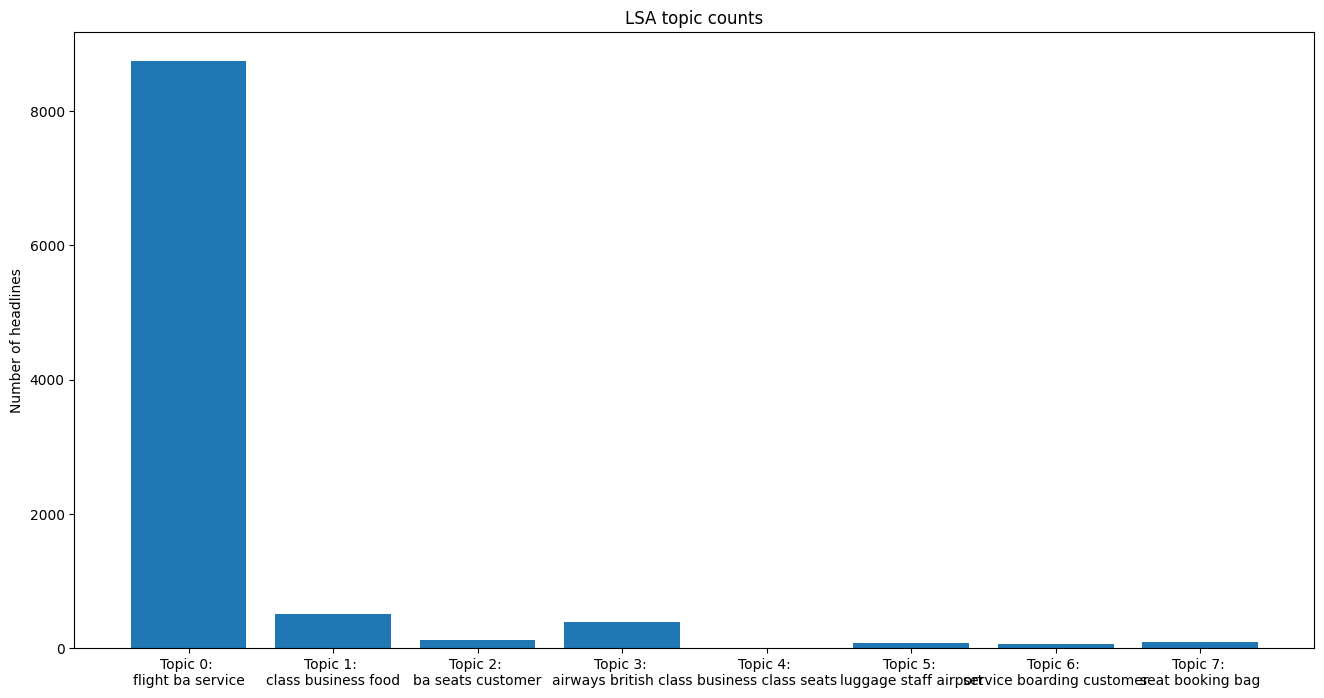

In [124]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of headlines');
ax.set_title('LSA topic counts');
plt.show()

In [125]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100,
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.039s...
[t-SNE] Computed neighbors for 10000 samples in 2.692s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.781170
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.554329
[t-SNE] KL divergence after 2000 iterations: -0.235487


In [126]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])

        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [127]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [129]:
!pip install --upgrade bokeh

In [130]:
plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), width=700, height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1],
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

In [131]:
# LDA -  Linear Discriminant Analysis

lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online',
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [132]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [133]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  flight ba crew service cabin food good time seat london
Topic 2:  flight ba london service food staff economy british airways crew
Topic 3:  flight ba service airways british customer refund cancelled travel told
Topic 4:  ba flight time british crew airways service club baggage cabin
Topic 5:  flight ba hours london airport told service time british heathrow
Topic 6:  ba flight service staff class business airline seats seat british
Topic 7:  flight good ba service food crew seat business class time
Topic 8:  flight ba service class business seat food seats good london


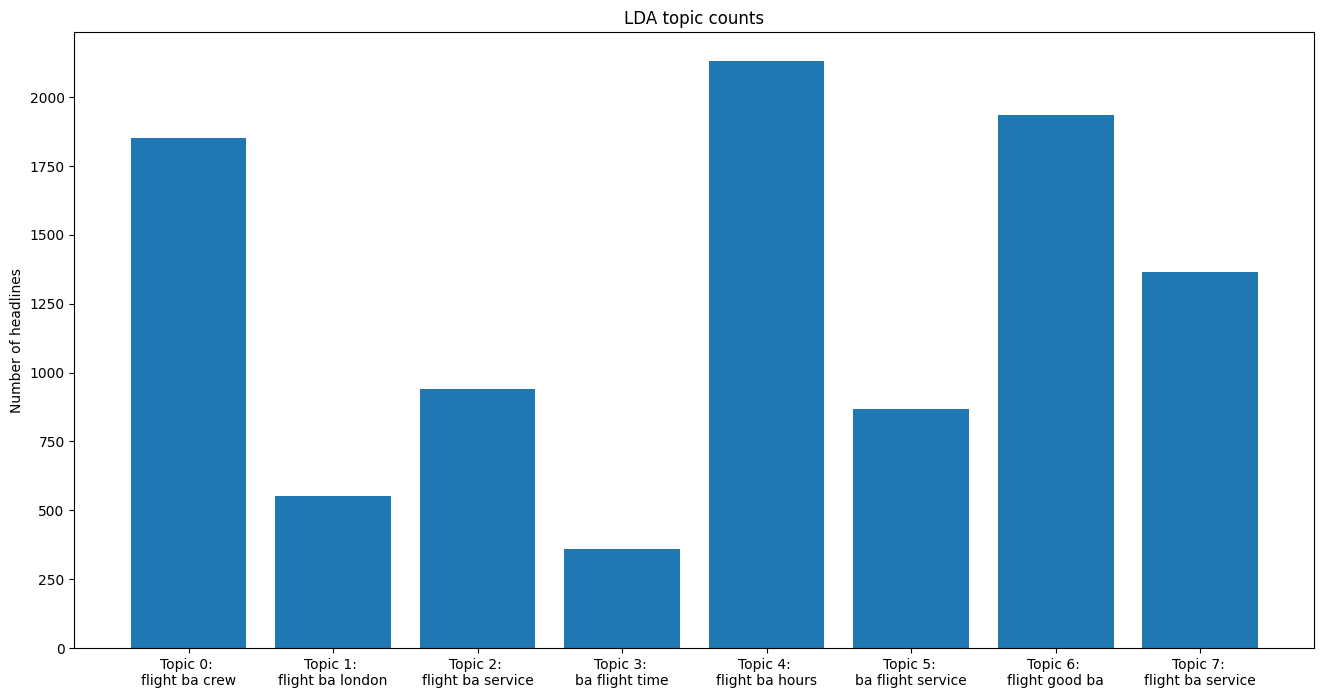

In [134]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of headlines');

<ipython-input-140-1566b77c779c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=word_freq_df.head(20), palette="viridis")


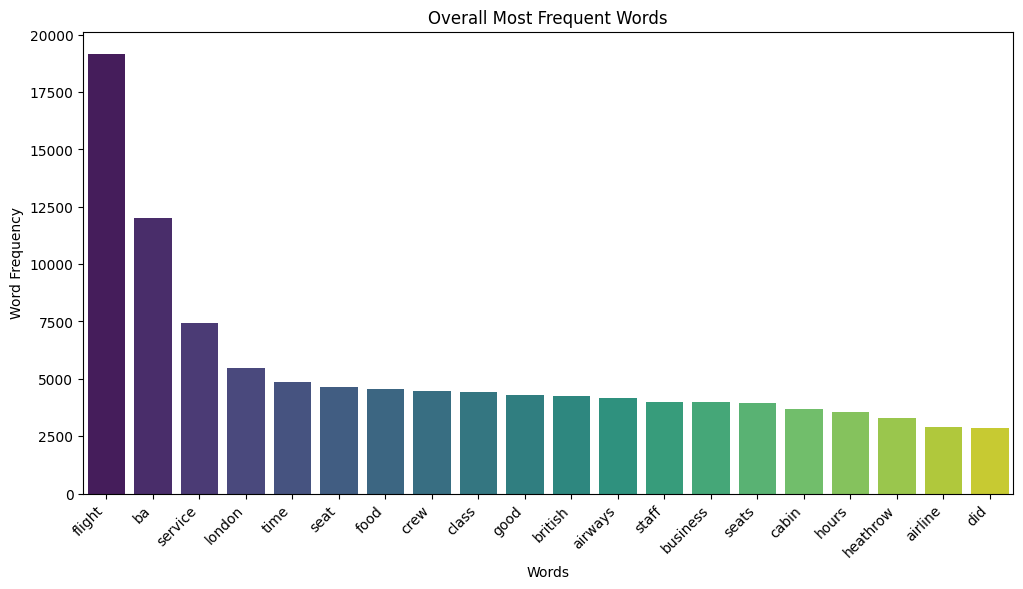

In [140]:
import seaborn as sns

# Assuming you have a CountVectorizer named small_count_vectorizer
all_words = small_count_vectorizer.get_feature_names_out()

# Transform the document term matrix to get word frequencies
word_frequencies = small_document_term_matrix.sum(axis=0).A1

# Create a DataFrame for visualization
word_freq_df = pd.DataFrame({'Word': all_words, 'Frequency': word_frequencies})

# Sort the DataFrame by frequency
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Visualize the overall most frequent words
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=word_freq_df.head(20), palette="viridis")
plt.title("Overall Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Word Frequency")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

##Sentiment Scores by Textbob

In [159]:
from textblob import TextBlob
import pandas as pd

# Assuming you have a DataFrame named df with a 'ba' column containing reviews
corpus = ba.tolist()

# Calculate sentiment scores for each review
results = []

for review in corpus:
    # Analyze sentiment for each review using TextBlob
    blob = TextBlob(review)
    sentiment_score = blob.sentiment.polarity
    results.append(sentiment_score)

# Categorize reviews into positive, negative, and neutral based on sentiment scores
positive_reviews = [score for score in results if score > 0]
negative_reviews = [score for score in results if score < 0]
neutral_reviews = [score for score in results if score == 0]

# Calculate percentages based on the number of reviews
total_reviews = len(results)
positive_percentage = (len(positive_reviews) / total_reviews) * 100
negative_percentage = (len(negative_reviews) / total_reviews) * 100
neutral_percentage = (len(neutral_reviews) / total_reviews) * 100

# Display the breakdown of sentiments
print("Positive Percentage:", positive_percentage)
print("Negative Percentage:", negative_percentage)
print("Neutral Percentage:", neutral_percentage)


Positive Percentage: 63.5
Negative Percentage: 35.5
Neutral Percentage: 1.0


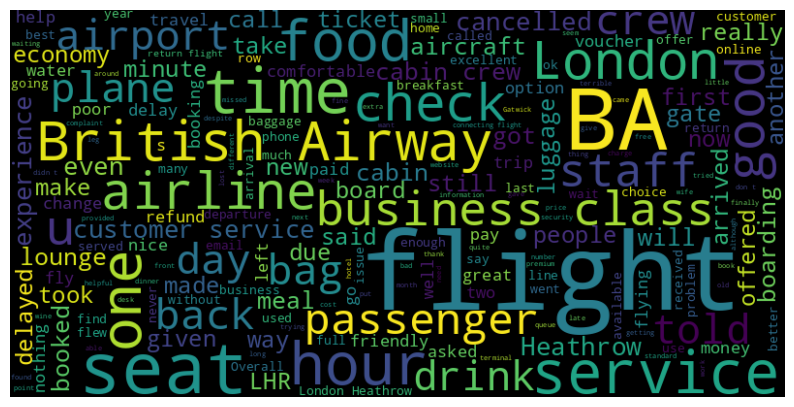

In [160]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
all_reviews_text = " ".join(corpus)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_reviews_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()